In [3]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from inverse_utils import sampling_mask_gen, ifft, nrmse_np
from skimage.metrics import structural_similarity as ssim

In [4]:
samp_num = 0
sz = 256
R = 3
gamma = 3.0
file = f'/home/blevac/infty-diff/results/sample_num{samp_num}_img_size{sz}_R{R}_gamma{gamma}.pt'
cont = torch.load(file)
print(cont.keys())

gt_img = cont['gt_img']
recon_img = cont['img_out']
deblurred_recon_img = cont['deblurred_img_out']
kspace = torch.tensor(cont['kspace'])
img_stack = cont['img_stack']
ZF_recon = ifft(kspace).numpy()
mask = cont['mask'].cpu()
print(ZF_recon.shape)
print(gt_img.shape)
print(recon_img.shape)
print(img_stack.shape)

recon_img=img_stack[-2][None].numpy()

dict_keys(['gt_img', 'deblurred_img_out', 'img_out', 'kspace', 'img_stack', 'mask'])
(1, 1, 256, 256)
(1, 1, 256, 256)
(1, 1, 256, 256)
torch.Size([300, 1, 256, 256])


In [5]:
nrmse_ZF = nrmse_np(abs(gt_img), abs(ZF_recon))
nrmse_mol = nrmse_np(abs(gt_img), abs(recon_img))
nrmse_db = nrmse_np(abs(gt_img), abs(deblurred_recon_img))

ssim_ZF = ssim(abs(gt_img[0,0]), abs(ZF_recon[0,0]), data_range=abs(gt_img).max()-abs(gt_img).min())
ssim_mol = ssim(abs(gt_img[0,0]), abs(recon_img[0,0]), data_range=abs(gt_img).max()-abs(gt_img).min())
ssim_db = ssim(abs(gt_img[0,0]), abs(deblurred_recon_img[0,0]), data_range=abs(gt_img).max()-abs(gt_img).min())

print('NRMSE ZF: ', nrmse_ZF, 'SSIM ZF: ', ssim_ZF)
print('NRMSE MOL: ', nrmse_mol, 'SSIM MOL: ', ssim_mol)
print('NRMSE DB: ', nrmse_db, 'SSIM DB: ', ssim_db)

NRMSE ZF:  0.38625998166300907 SSIM ZF:  0.5394036522681163
NRMSE MOL:  0.12316565571767063 SSIM MOL:  0.9097760145250096
NRMSE DB:  0.7698731612447077 SSIM DB:  0.37835267622306984


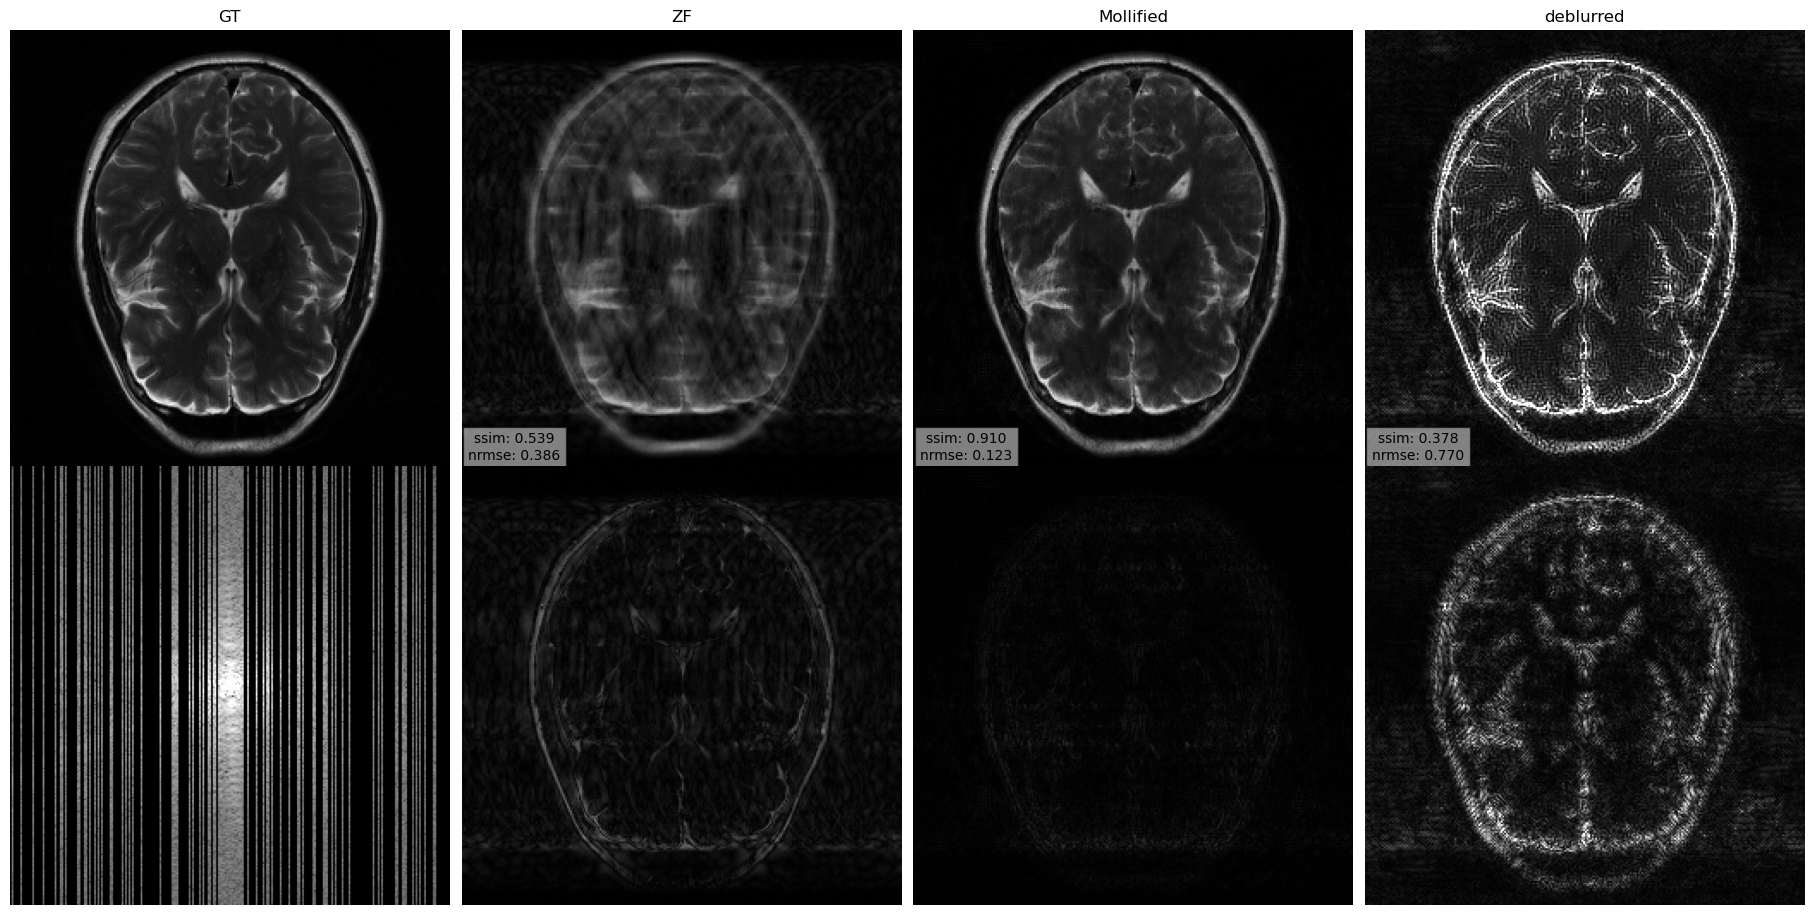

In [10]:
plt.figure(figsize=(18,9))
plt.subplot(2,4,1)
plt.title('GT')
plt.imshow(abs(gt_img[0,0]),cmap='gray',vmin=0, vmax = 1)
plt.axis('off')
plt.subplot(2,4,2)
plt.title('ZF')
plt.imshow(abs(ZF_recon[0,0]),cmap='gray', vmin=0, vmax=1)
plt.text(.12, 0.05, f'ssim: {ssim_ZF:.3f}\nnrmse: {nrmse_ZF:.3f}', horizontalalignment='center',verticalalignment='center', bbox=dict(facecolor='white', alpha=0.5),transform=plt.gca().transAxes)

plt.axis('off')
plt.subplot(2,4,3)
plt.title('Mollified')
plt.imshow(abs(recon_img[0,0]),cmap='gray', vmin=0, vmax=1)
plt.text(.12, 0.05, f'ssim: {ssim_mol:.3f}\nnrmse: {nrmse_mol:.3f}', horizontalalignment='center',verticalalignment='center', bbox=dict(facecolor='white', alpha=0.5),transform=plt.gca().transAxes)

plt.axis('off')
plt.subplot(2,4,4)
plt.title('deblurred')
plt.imshow(abs(deblurred_recon_img[0,0]),cmap='gray',vmin=0, vmax = 1)
plt.text(.12, 0.05, f'ssim: {ssim_db:.3f}\nnrmse: {nrmse_db:.3f}', horizontalalignment='center',verticalalignment='center', bbox=dict(facecolor='white', alpha=0.5),transform=plt.gca().transAxes)
plt.axis('off')

plt.subplot(2,4,5)
plt.imshow(abs((kspace)[0,0]**.2),cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.subplot(2,4,6)
plt.imshow(abs((gt_img-ZF_recon)[0,0]),cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.subplot(2,4,7)
plt.imshow(abs((gt_img-recon_img)[0,0]),cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.subplot(2,4,8)
plt.imshow(abs((gt_img-deblurred_recon_img)[0,0]),cmap='gray',vmin=0, vmax = 1)
plt.axis('off')

plt.tight_layout(pad=0.2)

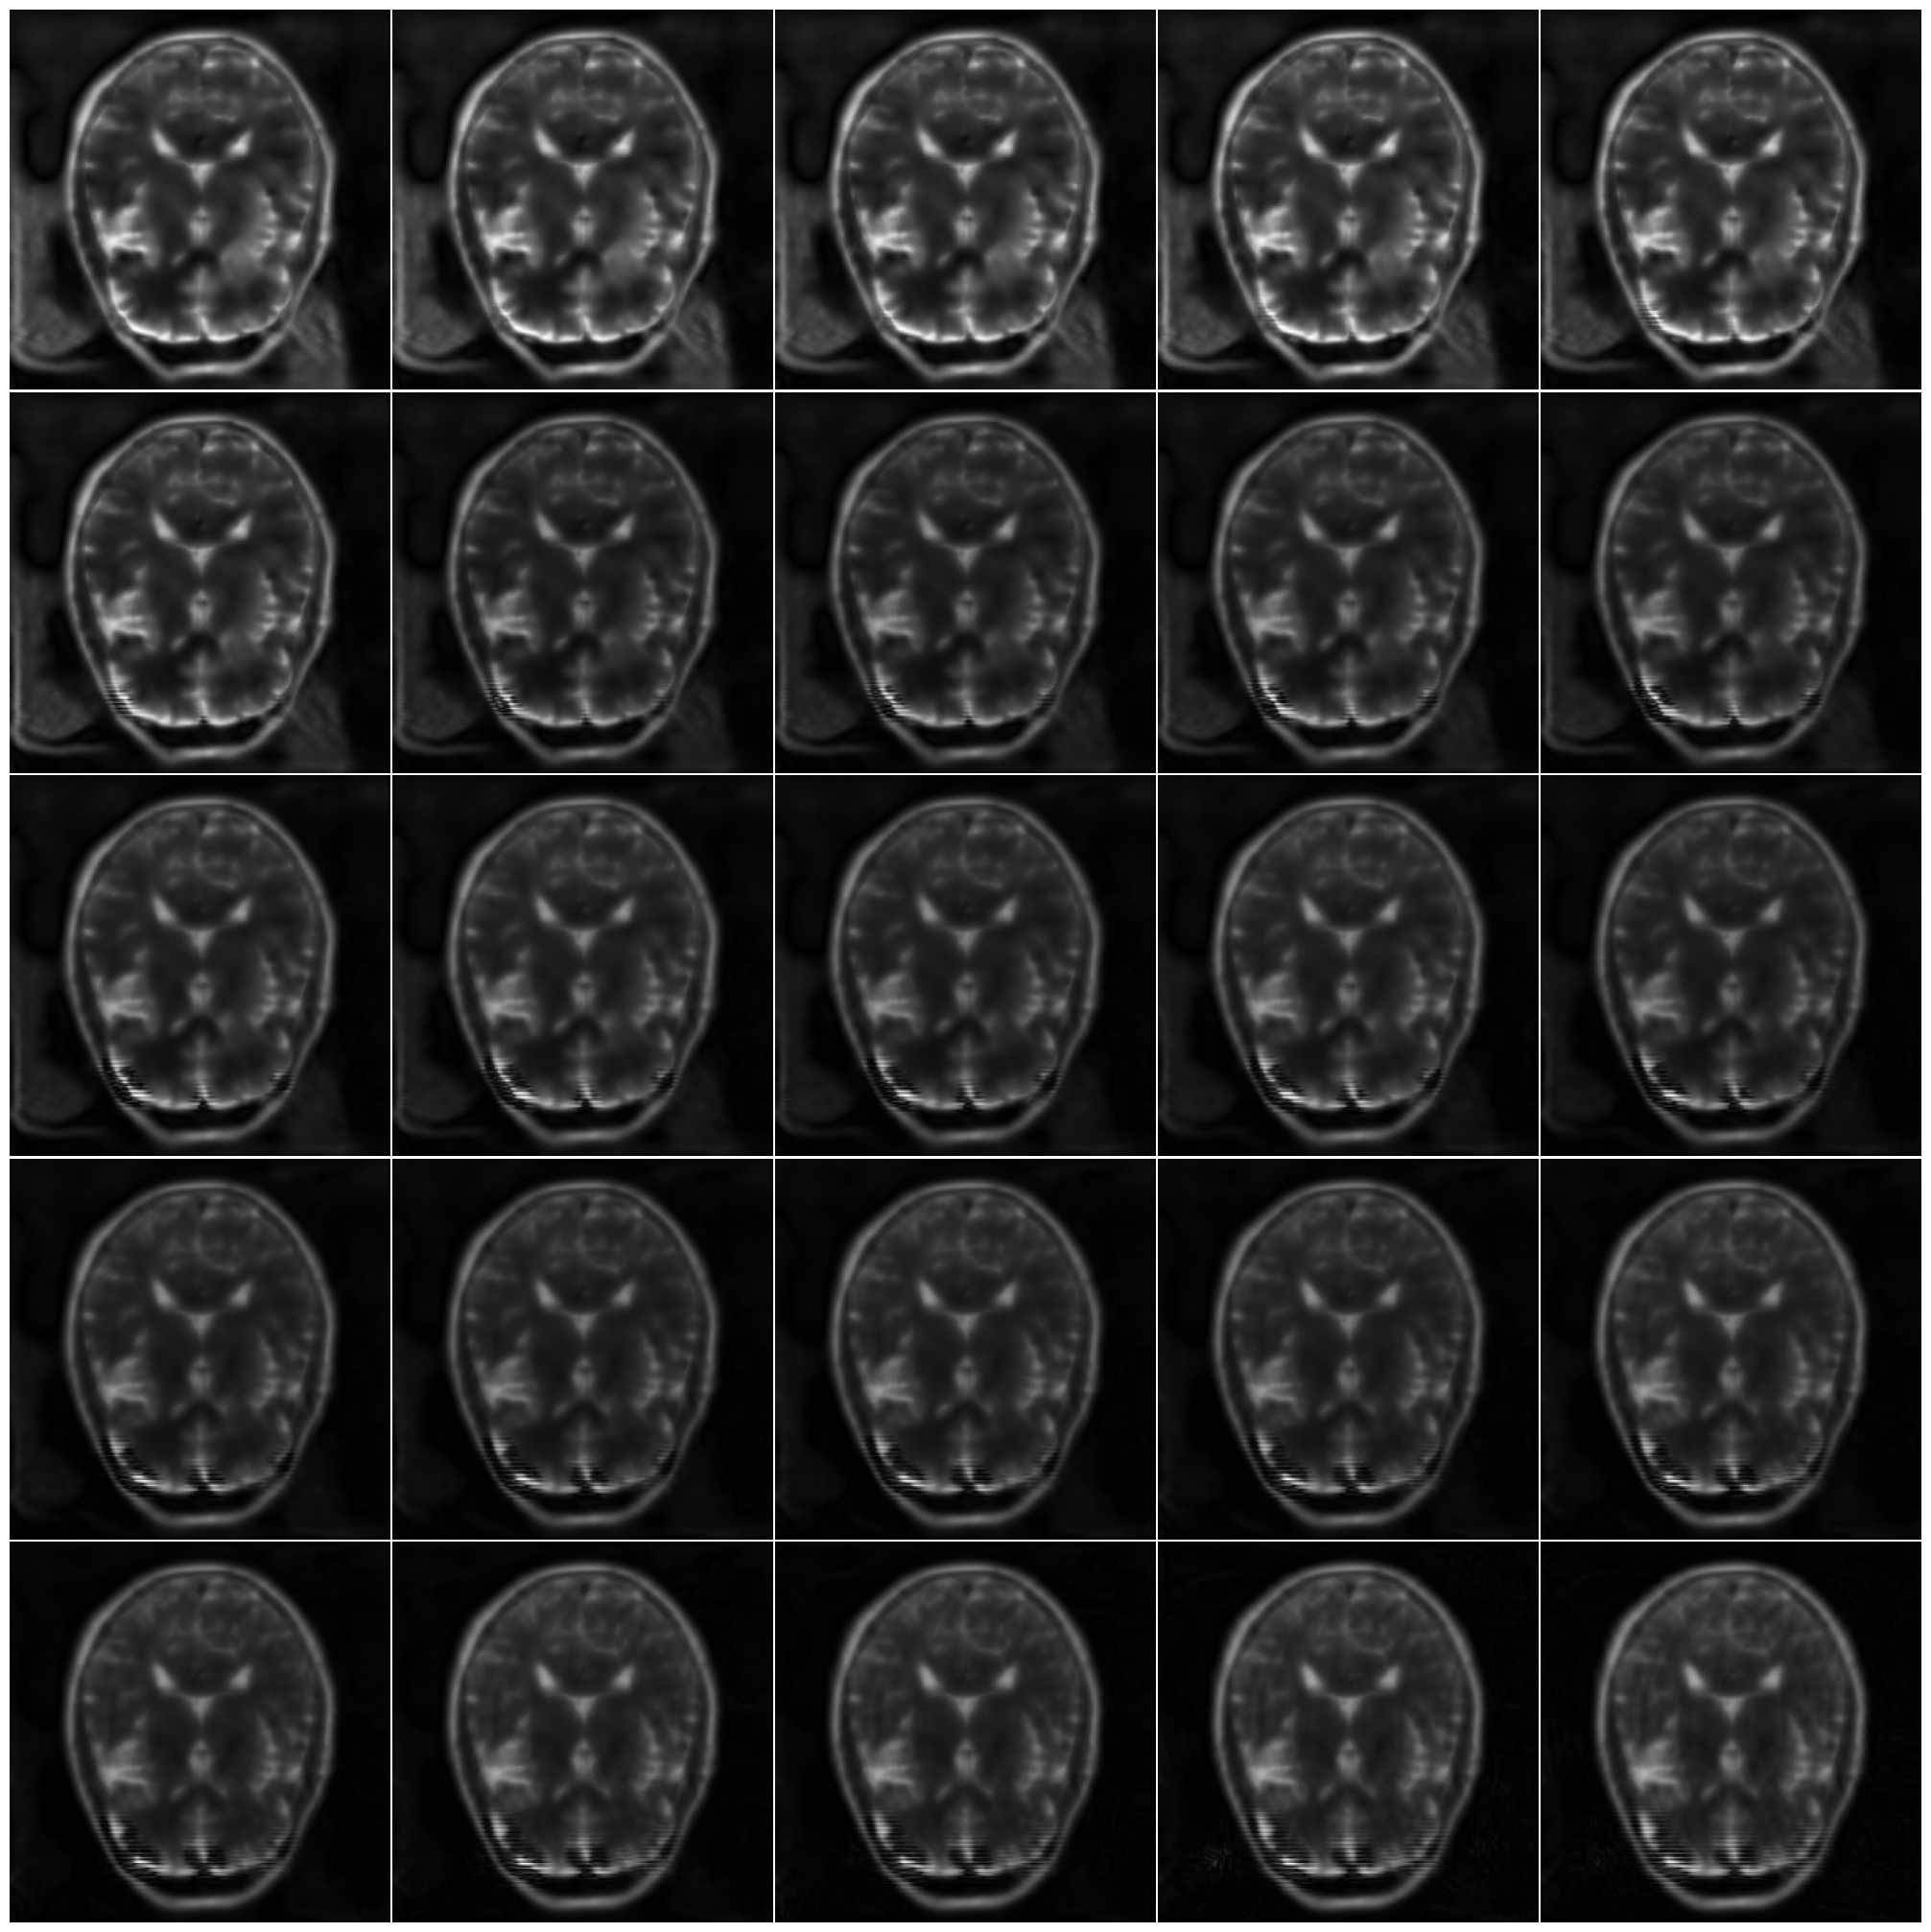

In [98]:
plt.figure(figsize=(20,20))
for i in range(25):
    plt.subplot(5,5,i+1)
    img = abs(img_stack[275+i,0,...]).numpy()
    nrmse_loss = nrmse_np(abs(gt_img[0,0]),img)
    plt.imshow(img,cmap='gray')
    plt.axis('off')

plt.tight_layout(pad=0.2)